In [1]:
#importar librerias
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from docplex.mp.model import Model;

In [2]:
#Crear datos
N=20;
np.random.seed(1);
x=list(np.random.random(N)*100);
y=list(np.random.random(N)*100);
demanda=list(np.random.randint(low=10,high=50,size=N));

In [3]:
#Definicion de conjuntos
nodos=[i for i in range(N)];
ubicaciones=[i for i in nodos]; #{}: significa creación de un diccionario, fundamental para crear la variables binarias
#Matriz de arcos
arcos=[(i,j) for i in nodos for j in ubicaciones]; #{}: significa creación de un diccionario, fundamental para crear las variables binarias
#Maximo numero de ubicaciones
p=5; 
#Matriz de distancias
distancia={(i,j):np.hypot(x[i]-x[j],y[i]-y[j]) for i in nodos for j in ubicaciones} 

In [4]:
mdl=Model("P-MedianProblem")

In [5]:
#Creación de variables binarias
X=mdl.binary_var_dict(arcos,name="X") 
Y=mdl.binary_var_dict(ubicaciones,name="Y")

In [6]:
#Creación de función objetivo
obj=mdl.sum(distancia[i,j]*X[i,j] for j in ubicaciones for i in nodos)
#Instrucción de optimización
mdl.minimize(obj)

In [7]:
#Creación de restricciones
mdl.add_constraints(mdl.sum(X[i,j] for j in ubicaciones)==1 for i in nodos) #Se agrega restricción para cada nodo ya que la indicacion es constraints
mdl.add_constraint(mdl.sum(Y[j] for j in ubicaciones)==p) #Equivale a una sola restricción
mdl.add_constraints(X[i,j]-Y[j] <= 0 for i in nodos for j in ubicaciones) #Restringe que cada nodo sea abastecido por la ubicacion correspondiente
#Creación de variable que almacena la solución del modelo e "instrucción de visualización"
solucion=mdl.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced MIP has 421 rows, 420 columns, and 1220 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.09 sec. (1.16 ticks)
Found incumbent of value 842.618875 after 0.09 sec. (1.41 ticks)
Probing time = 0.02 sec. (0.45 ticks)
Tried aggregator 1 time.
Reduced MIP has 421 rows, 420 columns, and 1220 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (1.33 ticks)
Probing time = 0.02 sec. (0.45 ticks)
Clique table members: 420.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.06 sec. (0.98 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                          842.6189        0.0000      

In [8]:
#Instrucción que permite verificar si la solución es óptima
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [9]:
#Intrucción que permite visualizar las soluciones
solucion.display()

solution for: P-MedianProblem
objective: 223.708
X_0_17 = 1
X_1_17 = 1
X_2_6 = 1
X_3_4 = 1
X_4_4 = 1
X_5_4 = 1
X_6_6 = 1
X_7_10 = 1
X_8_10 = 1
X_9_17 = 1
X_10_10 = 1
X_11_11 = 1
X_12_4 = 1
X_13_11 = 1
X_14_4 = 1
X_15_11 = 1
X_16_17 = 1
X_17_17 = 1
X_18_6 = 1
X_19_4 = 1
Y_4 = 1
Y_6 = 1
Y_10 = 1
Y_11 = 1
Y_17 = 1


In [10]:
#Creación de lista con arcos seleccionados
arcos_activos=[k for k in arcos if X[k].solution_value>0.99]
print(arcos_activos)

[(0, 17), (1, 17), (2, 6), (3, 4), (4, 4), (5, 4), (6, 6), (7, 10), (8, 10), (9, 17), (10, 10), (11, 11), (12, 4), (13, 11), (14, 4), (15, 11), (16, 17), (17, 17), (18, 6), (19, 4)]


In [11]:
#Creación de lista con ubicaciones seleccionadas
ubicaciones_activas=[k for k in ubicaciones if Y[k].solution_value>0.99]
print(ubicaciones_activas)

[4, 6, 10, 11, 17]


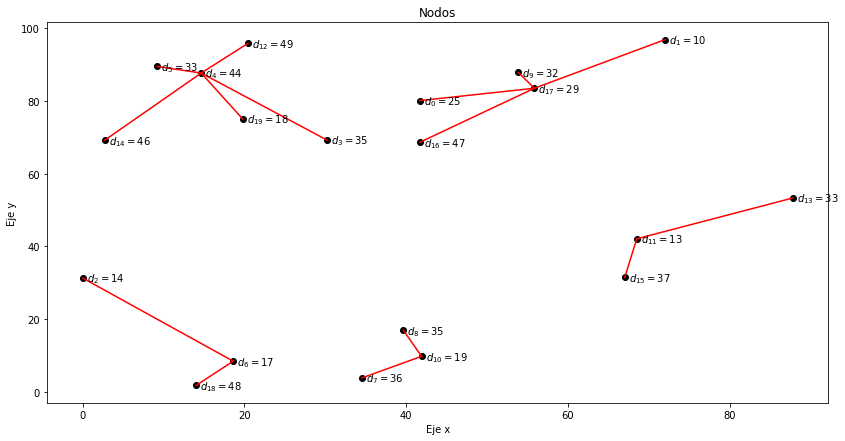

In [12]:
#Creación Gráfico
plt.figure(figsize=(14,7));
plt.scatter(x,y,color="black");

#Codigo que permite anotar etiquetas a los puntos gráficados (nodos)
for i in range(len(x)):
    plt.annotate("$d_{%d}=%d$"%(i,demanda[i]),(x[i]+0.5,y[i]-1),size=10);
    
#Codigo que permite graficar las lineas de conexión entre los nodos y las ubicaciones seleccionadas para su abastecimiento
for n in arcos_activos:
    i=n[0]
    j=n[1]
    plt.plot([x[i],x[j]],[y[i],y[j]],color="red")

#Codigos para indicar nombre a los ejes y título del gráfico
plt.xlabel("Eje x");
plt.ylabel("Eje y");
plt.title("Nodos");
plt.show();

In [13]:
print(obj.solution_value)

223.70793924145528
